In [1]:
import numpy as np
import random
import importlib
import matplotlib.pyplot as plt
import multiprocessing as mp
import tables as pt
import check_entropy
importlib.reload(check_entropy)
from check_entropy import *
line = lambda x,a,b : a*x+b
from scipy.optimize import curve_fit

In [2]:
# import a curve
S_20_curve = np.load('/home/hcleroy/PostDoc/aging_condensates/Simulation/Evolution_of_the_entropy/Res/10_20_30_linkers/20_linker.npy')
S_30_curve = np.load('/home/hcleroy/PostDoc/aging_condensates/Simulation/Evolution_of_the_entropy/Res/10_20_30_linkers/30_linker.npy')
popt_20,pconv_20 = curve_fit(line,np.log(S_20_curve[4:,0]),S_20_curve[4:,1])
popt_30,pconv_30 = curve_fit(line,np.log(S_30_curve[4:,0]),S_30_curve[4:,1])


1.3150650797586994
1.8017772605995415


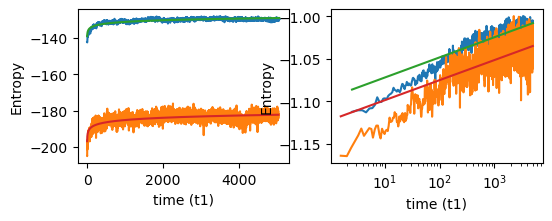

In [3]:
fig,ax = plt.subplots(ncols=2,figsize=(6,2))
ax[0].plot(S_20_curve[4:,0],S_20_curve[4:,1])
ax[0].plot(S_30_curve[4:,0],S_30_curve[4:,1])
ax[0].plot(S_20_curve[4:,0],line(np.log(S_20_curve[4:,0]),*popt_20))
ax[0].plot(S_30_curve[4:,0],line(np.log(S_30_curve[4:,0]),*popt_30))
#ax.set_xscale('log')
ax[0].set_xlabel('time (t1)')
ax[0].set_ylabel('Entropy')

ax[1].plot(S_20_curve[4:,0],S_20_curve[4:,1]/abs(max(S_20_curve[4:,1])))
ax[1].plot(S_30_curve[4:,0],S_30_curve[4:,1]/abs(max(S_30_curve[4:,1])))
ax[1].plot(S_20_curve[4:,0],line(np.log(S_20_curve[4:,0]),*popt_20)/abs(max(S_20_curve[4:,1])))
ax[1].plot(S_30_curve[4:,0],line(np.log(S_30_curve[4:,0]),*popt_30)/abs(max(S_30_curve[4:,1])))
ax[1].set_xscale('log')
ax[1].set_xlabel('time (t1)')
ax[1].set_ylabel('Entropy')

print(popt_20[0])
print(popt_30[0])

Text(0, 0.5, 'Entropy')

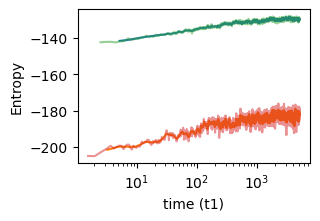

In [4]:
X_av_20,Y_av_20 = moving_average(S_20_curve[4:,0],S_20_curve[4:,1],10)
X_av_30,Y_av_30 = moving_average(S_30_curve[4:,0],S_30_curve[4:,1],10)
fig,ax = plt.subplots(figsize=(3,2))
ax.plot(X_av_20,Y_av_20)
ax.plot(X_av_30,Y_av_30)
ax.plot(S_20_curve[4:,0],S_20_curve[4:,1],alpha=0.5)
ax.plot(S_30_curve[4:,0],S_30_curve[4:,1],alpha=0.5)
ax.set_xscale('log')
ax.set_xlabel('time (t1)')
ax.set_ylabel('Entropy')

In [8]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 100/(V) # for 1D
Energy = -15
Nprocess = 12
seeds = random.sample(range(0,10000000),Nprocess)
args = [[ell_tot,Energy,kdiff,seeds[i],Nlinker,3] for i in range(Nprocess)]
# Simulation parameters
step_tot = 200000
compute_steps = 1000

In [9]:
Parallel_pictures(args,step_tot,compute_steps,'20_linkers_E_15.hdf5',1,X_av_20,Y_av_20)

In [10]:
# gillespie parameter
Nlinker = 30
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 100/(V) # for 1D
Energy = -15
Nprocess = 12
seeds = random.sample(range(0,10000000),Nprocess)
args = [[ell_tot,Energy,kdiff,seeds[i],Nlinker,3] for i in range(Nprocess)]
# Simulation parameters
step_tot = 300000
compute_steps = 1000

In [11]:
Parallel_pictures(args,step_tot,compute_steps,'30_linkers_E_15.hdf5',1,X_av_30,Y_av_30)

In [12]:
file_20 = pt.open_file('20_linkers_E_15.hdf5',mode='r')
file_30 = pt.open_file('30_linkers_E_15.hdf5',mode='r')

In [19]:
for node in file_20.walk_nodes('/', classname='Array'):
    print(node._v_name)

R_0x2d5fdd
R_0x2e3493
R_0x316ed5
R_0x45a2f5
R_0x4939b6
R_0x4b429
R_0x688c6a
R_0x6e41f5
R_0x6f3bee
R_0x7581a
R_0x8bf1bd
R_0x904644
ell_coordinates_0x2d5fdd
ell_coordinates_0x2e3493
ell_coordinates_0x316ed5
ell_coordinates_0x45a2f5
ell_coordinates_0x4939b6
ell_coordinates_0x4b429
ell_coordinates_0x688c6a
ell_coordinates_0x6e41f5
ell_coordinates_0x6f3bee
ell_coordinates_0x7581a
ell_coordinates_0x8bf1bd
ell_coordinates_0x904644


In [13]:
Rs_20 = file_20.root.R_0x1f6336.read()
Ells_20 = file_20.root.ell_coordinates_0x1f6336.read()

Rs_30 = file_30.root.R_0x1476ae.read()
Ells_30 = file_30.root.ell_coordinates_0x1476ae.read()

In [14]:
file_20.close()
file_30.close()

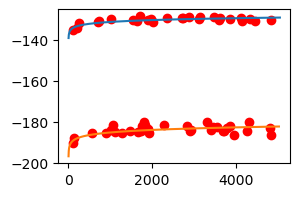

In [15]:
plt.figure(figsize=(3,2))
plt.scatter(Rs_20[:,1,0],Rs_20[:,0,0],color='red')
plt.scatter(Rs_30[:,1,0],Rs_30[:,0,0],color='red')
plt.plot(S_20_curve[4:,0],line(np.log(S_20_curve[4:,0]),*popt_20))
plt.plot(S_30_curve[4:,0],line(np.log(S_30_curve[4:,0]),*popt_30))

In [16]:
indexs_20 = np.argwhere(~np.isnan(Rs_20[:,1,0]))[:,0]
indexs_30 = np.argwhere(~np.isnan(Rs_30[:,1,0]))[:,0]

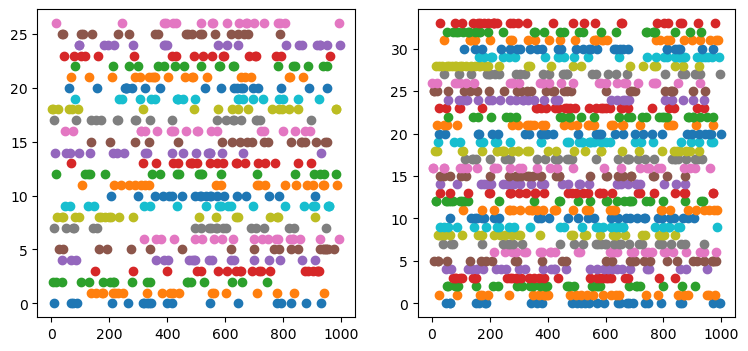

In [17]:
fig,ax = plt.subplots(ncols=2,figsize=(9,4))
for i in range(indexs_20.shape[0]):
    ax[0].scatter(Ells_20[indexs_20[i]],[i for _ in range(Ells_20[indexs_20[i]].shape[0])])
for i in range(indexs_30.shape[0]):
    ax[1].scatter(Ells_30[indexs_30[i]],[i for _ in range(Ells_30[indexs_30[i]].shape[0])])

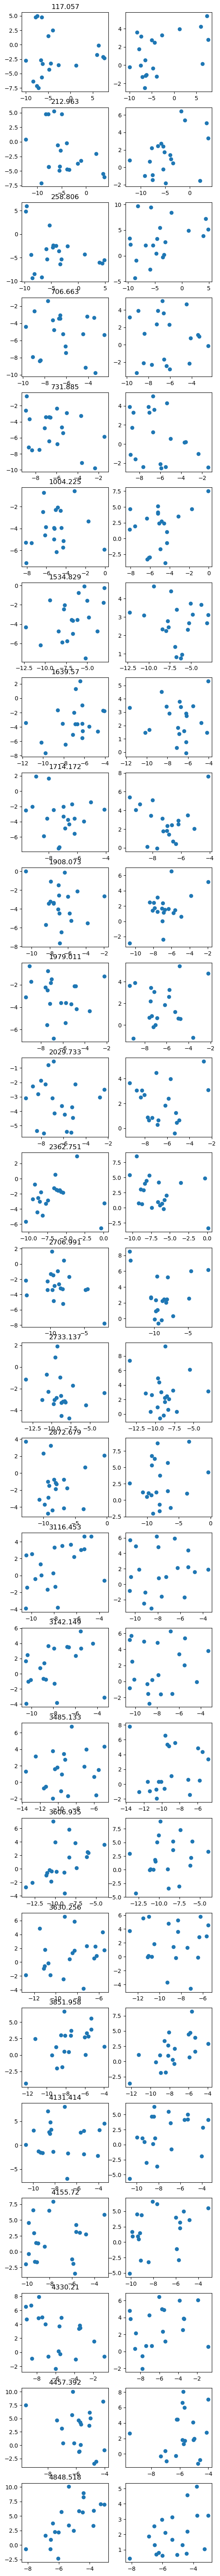

In [19]:
fig,ax = plt.subplots(nrows= indexs_20.shape[0],ncols=2,figsize=(6,3*indexs_20.shape[0]))
for i,index in enumerate(indexs_20) :
    ax[i,0].set_title(str(truncate(Rs_20[index,1,0],3)))    
    ax[i,0].scatter(Rs_20[index,2:,0],Rs_20[index,2:,1])
    ax[i,1].scatter(Rs_20[index,2:,0],Rs_20[index,2:,2])

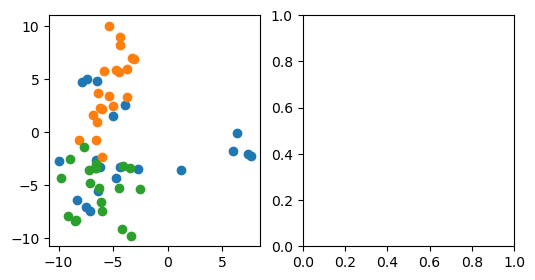

In [21]:
fig,ax = plt.subplots(ncols=2,figsize=(6,3))
ax[0].scatter(Rs_20[indexs_20[0],2:,0],Rs_20[indexs_20[0],2:,1])
ax[0].scatter(Rs_20[indexs_20[-1],2:,0],Rs_20[indexs_20[-1],2:,1])
ax[0].scatter(Rs_20[indexs_20[3],2:,0],Rs_20[indexs_20[3],2:,1])